# 기본모델 (회귀분석)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xData = np.array([1,2,3,4])
xData_2 = xData.reshape([4,1])
yData = np.array([3,5,10,13])

In [3]:
w = tf.Variable(tf.random_uniform([1]))
w0 = tf.Variable(tf.random_uniform([1]))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [4]:
function = w0 + w*X
# tf.square -> x*x = x^2
costFunction = tf.reduce_mean(tf.square(function - Y))
trainOptimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = trainOptimizer.minimize(costFunction)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
itrNum = 0

for step in range(100):
    itrNum += 1
    trainValue,costFunctionValue = sess.run([train, costFunction], feed_dict = {X:xData, Y:yData})
    if (itrNum % 10 == 0) :
        print ("Step : %d, cost(loss) : %f " %(itrNum, costFunctionValue))

Step : 10, cost(loss) : 1.030404 
Step : 20, cost(loss) : 0.711714 
Step : 30, cost(loss) : 0.558327 
Step : 40, cost(loss) : 0.474818 
Step : 50, cost(loss) : 0.429348 
Step : 60, cost(loss) : 0.404592 
Step : 70, cost(loss) : 0.391112 
Step : 80, cost(loss) : 0.383773 
Step : 90, cost(loss) : 0.379776 
Step : 100, cost(loss) : 0.377601 


In [7]:
wValue = sess.run(w)
print (wValue)

[3.4588277]


In [8]:
print ("예측 1 : ",sess.run(function, feed_dict = {X:10}))

예측 1 :  [33.709328]


In [9]:
def predict(x):
    result = 0.0
    for n in range(0,4):
        result += wValue * x
    return result

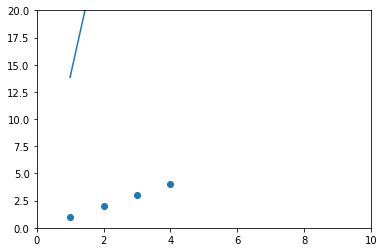

In [10]:
fig = plt.figure()
#add_subplot(x행, y열, 몇번째 plot 번호)
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(0,10)
subplot.set_ylim(0,20)
subplot.scatter(range(1,5), xData_2)
linex = np.linspace(1,4,100)
liney = predict(linex)
subplot.plot(linex, liney)